In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

In [2]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


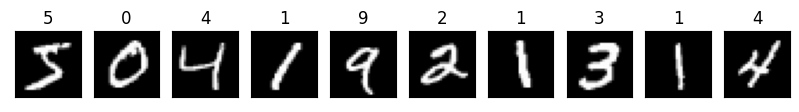

In [7]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [8]:
to_categorical(3, num_classes=10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
# Convert y_train into one-hot format 
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)

# Convert y_test into one-hot format 
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)


In [14]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

In [19]:
# Train the Neural Network model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7745 - acc: 0.7790 - val_loss: 0.7397 - val_acc: 0.7979
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7344 - acc: 0.7959 - val_loss: 0.6908 - val_acc: 0.8169
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7386 - acc: 0.7922 - val_loss: 0.6863 - val_acc: 0.8065
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7434 - acc: 0.7873 - val_loss: 0.7057 - val_acc: 0.8116
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7145 - acc: 0.8000 - val_loss: 0.6913 - val_acc: 0.8120
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6882 - acc: 0.8101 - val_loss: 0.6976 - val_acc: 0.8031
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6874 - acc: 0.8046 - val_loss: 0.6877 - val_acc: 0.7995
Epoch 8/10
1875/1875 [==============================] - 9s 5

In [20]:
# Making predictions using our trained model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


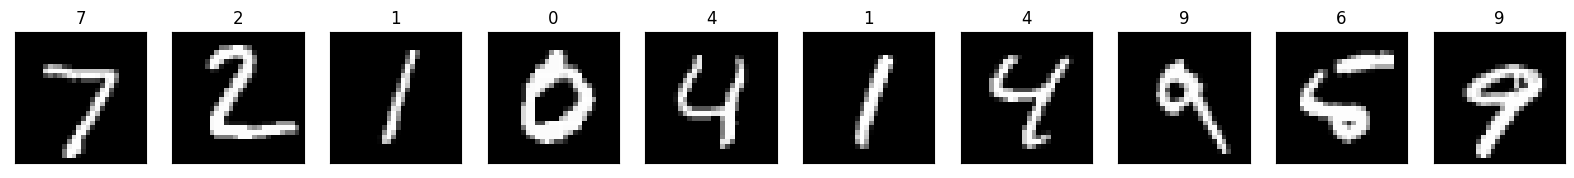

In [21]:
# Display some predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()